In [1]:
import rosbag
from geometry_msgs.msg import PoseWithCovariance
import numpy as np
# import pandas as pd
TOPICS = ['/current_pose', '/dji_osdk_ros/height_above_takeoff']
takeoff = False
messages = []
poses = []
# path = "../calibrate/no-rtk-odom-augment.bag"
path = "../calibrate/rtk-odom-test.bag"
bag = rosbag.Bag(path)
for topic, msg, t in bag.read_messages(TOPICS):
    if topic == '/dji_osdk_ros/height_above_takeoff' and takeoff == False:
        if msg.data > 1:
            takeoff = True
    if topic == "/current_pose" and takeoff == True:
        messages.append(msg.pose)
        poses.append([msg.pose.pose.position.x, msg.pose.pose.position.y])

data = np.asarray(poses)


(921, 2)
absolute drift (m): [ 3.78794912 22.21039593]


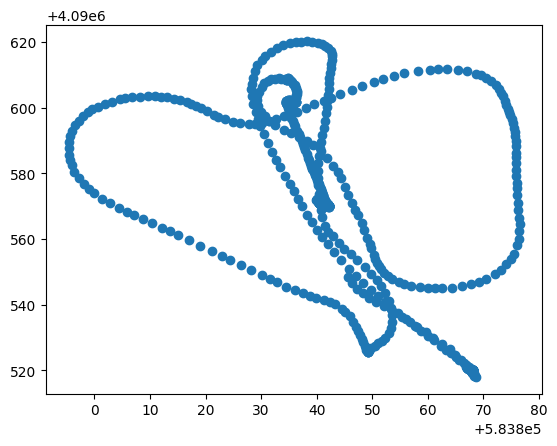

In [2]:
import matplotlib.pyplot as plt
print(data.shape)
start = 42
plt.scatter(data[start:,0], data[start:,1])
print("absolute drift (m):", abs(data[start] - data[data.shape[0]-1]))

In [44]:
distance = 0
for i in range(start,data.shape[0]-2):
    d = abs(np.linalg.norm(data[i] - data[i+1]))
    # print(d)
    distance += d

print(distance)

1233.9087830229219


<h1>For future refrence</h1><br />
With rtk odom accuracy<br />
[0.14870916 0.06873147] m (utm)<br />
over a distance of 682.4439588989059 m<br />

without rtk odom accuracy<br />
[1.21301856 9.7946717 ] m (utm)<br />
over a distance of 1233.9087830229219 m<br />

In [47]:
rtk_error = np.array([0.14870916, 0.06873147])
rtk_dist = 682.4439588989059

error = np.array([1.21301856, 9.7946717 ])
dist = 1233.9087830229219

print(rtk_error/rtk_dist , error/dist)
bad_rtk = rtk_error / rtk_dist
bad = error / dist

print("no rtk is", bad - bad_rtk, "worse per m traveled")

[0.00021791 0.00010071] [0.00098307 0.00793792]
no rtk is [0.00076516 0.00783721] worse per m traveled
